<a href="https://colab.research.google.com/github/cosmcbun/Explainable-Ai-Comps-2024/blob/main/%5BLIME%5D_ResNet_Cats_Dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Important imports

In [ ]:
import matplotlib.pyplot as plt
from PIL import Image
import torch.nn as nn
import numpy as np
import os, json
from google.colab import drive

import torch
from torchvision import models, transforms
from torch.autograd import Variable
import torch.nn.functional as F

# Set GPU device
print(torch.cuda.is_available())
device = torch.device("cuda:0")

False


In [ ]:
# Mount drive (mounts to much higher folder than "My Drive")
drive.mount("/content/drive/")
# This path extension only works when you have our "/Explainable AI Group Work/" folder as a shortcut in "MyDrive"
path = "/content/drive/My Drive/Explainable AI Group Work/resnet_model"

Mounted at /content/drive/


Documentation from helpful LIME tutorial (https://github.com/marcotcr/lime/blob/master/doc/notebooks/Tutorial%20-%20images%20-%20Pytorch.ipynb)

Get image

In [ ]:
from PIL import Image
import glob

def get_image(path):
    with open(os.path.abspath(path), 'rb') as f:
        with Image.open(f) as img:
            return img.convert('RGB')

#for filename in glob.glob('/content/drive/My Drive/Explainable AI Group Work/resnet_model/resnet_data/cat_dog_images/cat/abyssinian/*.jpg'):
#    im=get_image(filename)
#    image_list.append(im)

Checking interesting images for user study.

20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20


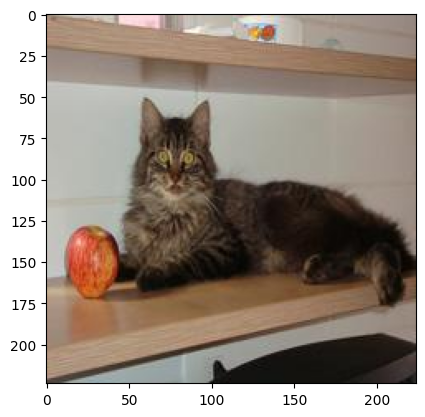

In [ ]:
image_list = []

# Dogs
image_list.append(get_image('/content/drive/My Drive/Explainable AI Group Work/resnet_model/resnet_data/cat_dog_images/dog/american_bulldog/dog-american_bulldog-102.jpg'))
image_list.append(get_image('/content/drive/My Drive/Explainable AI Group Work/resnet_model/resnet_data/cat_dog_images/dog/american_bulldog/dog-american_bulldog-148.jpg'))
image_list.append(get_image('/content/drive/My Drive/Explainable AI Group Work/resnet_model/resnet_data/cat_dog_images/dog/american_pit_bull_terrier/dog-american_pit_bull_terrier-61.jpg'))
image_list.append(get_image('/content/drive/My Drive/Explainable AI Group Work/resnet_model/resnet_data/cat_dog_images/dog/american_pit_bull_terrier/dog-american_pit_bull_terrier-103.jpg'))
image_list.append(get_image('/content/drive/My Drive/Explainable AI Group Work/resnet_model/resnet_data/cat_dog_images/dog/wheaten_terrier/dog-wheaten_terrier-48.jpg'))
image_list.append(get_image('/content/drive/My Drive/Explainable AI Group Work/resnet_model/resnet_data/cat_dog_images/dog/yorkshire_terrier/dog-yorkshire_terrier-35.jpg'))
image_list.append(get_image('/content/drive/My Drive/Explainable AI Group Work/resnet_model/resnet_data/cat_dog_images/dog/yorkshire_terrier/dog-yorkshire_terrier-37.jpg'))
image_list.append(get_image('/content/drive/My Drive/Explainable AI Group Work/resnet_model/resnet_data/cat_dog_images/dog/miniature_pinscher/dog-miniature_pinscher-100.jpg'))
image_list.append(get_image('/content/drive/My Drive/Explainable AI Group Work/resnet_model/resnet_data/cat_dog_images/dog/basset_hound/dog-basset_hound-46.jpg'))
image_list.append(get_image('/content/drive/My Drive/Explainable AI Group Work/resnet_model/resnet_data/cat_dog_images/dog/chihuahua/dog-chihuahua-195.jpg'))

# Cats
image_list.append(get_image('/content/drive/My Drive/Explainable AI Group Work/resnet_model/resnet_data/cat_dog_images/cat/birman/cat-birman-128.jpg'))
image_list.append(get_image('/content/drive/My Drive/Explainable AI Group Work/resnet_model/resnet_data/cat_dog_images/cat/ragdoll/cat-ragdoll-17.jpg'))
image_list.append(get_image('/content/drive/My Drive/Explainable AI Group Work/resnet_model/resnet_data/cat_dog_images/cat/sphynx/cat-sphynx-123.jpg'))
image_list.append(get_image('/content/drive/My Drive/Explainable AI Group Work/resnet_model/resnet_data/cat_dog_images/cat/sphynx/cat-sphynx-151.jpg'))
image_list.append(get_image('/content/drive/My Drive/Explainable AI Group Work/resnet_model/resnet_data/cat_dog_images/cat/sphynx/cat-sphynx-188.jpg'))
image_list.append(get_image('/content/drive/My Drive/Explainable AI Group Work/resnet_model/resnet_data/cat_dog_images/cat/bengal/cat-bengal-87.jpg'))
image_list.append(get_image('/content/drive/My Drive/Explainable AI Group Work/resnet_model/resnet_data/cat_dog_images/cat/bengal/cat-bengal-143.jpg'))
image_list.append(get_image('/content/drive/My Drive/Explainable AI Group Work/resnet_model/resnet_data/cat_dog_images/cat/british_shorthair/cat-british_shorthair-2.jpg'))
image_list.append(get_image('/content/drive/My Drive/Explainable AI Group Work/resnet_model/resnet_data/cat_dog_images/cat/bombay/cat-bombay-185.jpg'))
image_list.append(get_image('/content/drive/My Drive/Explainable AI Group Work/resnet_model/resnet_data/cat_dog_images/cat/maine_coon/cat-maine_coon-161.jpg'))

#for img in image_list:
  #plt.imshow(img)

In [ ]:
# Ignore this

from PIL import Image
import glob

def get_image(path):
    with open(os.path.abspath(path), 'rb') as f:
        with Image.open(f) as img:
            return img.convert('RGB')

image_list = []
for filename in glob.glob('yourpath/*.gif'): #assuming gif
    im=Image.open(filename)
    image_list.append(im)

for img in image_list:
  img = get_image('/content/drive/My Drive/Explainable AI Group Work/resnet_model/resnet_data/cat_dog_images/cat/ragdoll/cat-ragdoll-0.jpg')
  plt.imshow(img)

In [ ]:
# Ignore

class Animal_Model:

  def __init__(self):
    self.model = self.get_model()
    self.model.eval()
    self.transform = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )])

    return transf

  def get_model(self):
    pretrained_weights = models.ResNet18_Weights.IMAGENET1K_V1
    return models.resnet18(weights=pretrained_weights)

  def class_name(self, class_num):
    if class_num > 280 and class_num < 286:
      return "cat"
    if class_num < 269 and class_num > 150:
      return "dog"
    return "neither cat nor dog"

  def predict(self, filepath):
    image = Image.open(filepath)
    tensor = self.transform(image)

    print(tensor)
    self.transform = transforms.Compose([
      transforms.ToTensor()])
    tensor = self.transform(image)

    print(tensor)
    batch = torch.unsqueeze(tensor, 0);
    pred = self.model(batch).tolist()
    return self.class_name(np.argmax(pred[0]))

model = animal_model

Transform image

In [ ]:
# resize and take the center part of image to what our model expects
def get_input_transform():
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])
    transf = transforms.Compose([
        #transforms.Resize((256, 256)),
        #transforms.CenterCrop(224),
        transforms.ToTensor(),
        normalize
    ])

    return transf

def get_input_tensors(img):
    transf = get_input_transform()
    # unsqeeze converts single image to batch of 1
    return transf(img).unsqueeze(0)


Load the model

In [ ]:
pretrained_weights = models.ResNet18_Weights.IMAGENET1K_V1
model = models.resnet18(weights=pretrained_weights)
#model = models.inception_v3(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 51.5MB/s]


Load label texts for ImageNet predictions so we know what model is predicting

In [ ]:
idx2label, cls2label, cls2idx = [], {}, {}
with open(os.path.abspath('/content/drive/My Drive/Explainable AI Group Work/LIME/imagenet_class_index.json'), 'r') as read_file:
    class_idx = json.load(read_file)
    idx2label = [class_idx[str(k)][1] for k in range(len(class_idx))]
    cls2label = {class_idx[str(k)][0]: class_idx[str(k)][1] for k in range(len(class_idx))}
    cls2idx = {class_idx[str(k)][0]: k for k in range(len(class_idx))}


Get the predictions for our images.

In [ ]:
logits_list = []
for img in image_list:
  img_t = get_input_tensors(img)
  model.eval()
  logits = model(img_t)
  logits_list.append(logits)

Predictions we got are logits. Let's pass that through softmax to get probabilities and class labels for top 5 predictions.

In [ ]:
probs = F.softmax(logits_list[19], dim=1)
probs5 = probs.topk(5)
tuple((p,c, idx2label[c]) for p, c in zip(probs5[0][0].detach().numpy(), probs5[1][0].detach().numpy()))

((0.5255076, 281, 'tabby'),
 (0.124914266, 651, 'microwave'),
 (0.036944102, 285, 'Egyptian_cat'),
 (0.033950444, 904, 'window_screen'),
 (0.028482595, 722, 'ping-pong_ball'))

We are getting ready to use Lime. Lime produces the array of images from original input image by pertubation algorithm. So we need to provide two things: (1) original image as numpy array (2) classification function that would take array of purturbed images as input and produce the probabilities for each class for each image as output.

For Pytorch, first we need to define two separate transforms: (1) to take PIL image, resize and crop it (2) take resized, cropped image and apply whitening.

In [ ]:
def get_pil_transform():
    transf = transforms.Compose([
        transforms.Resize((256, 256)),
        transforms.CenterCrop(224)
    ])

    return transf

def get_preprocess_transform():
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225])
    transf = transforms.Compose([
        transforms.ToTensor(),
        normalize
    ])

    return transf

pill_transf = get_pil_transform()
preprocess_transform = get_preprocess_transform()

Now we are ready to define classification function that Lime needs. The input to this function is numpy array of images where each image is ndarray of shape (channel, height, width). The output is numpy aaray of shape (image index, classes) where each value in array should be probability for that image, class combination.

In [ ]:
def batch_predict(images):
    model.eval()
    batch = torch.stack(tuple(preprocess_transform(i) for i in images), dim=0)

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    batch = batch.to(device)

    logits = model(batch)
    probs = F.softmax(logits, dim=1)
    return probs.detach().cpu().numpy()

Let's test our function for the sample image.

In [ ]:
test_pred = batch_predict([pill_transf(image_list[0])])
test_pred.squeeze().argmax()

243

Install LIME

In [ ]:
!pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 6.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=ce8f522ff69e65b11852fcca8c8c4aaac242fc8f70cc8a277352a61aa40d3731
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
from lime import lime_image

In [ ]:
explainer = lime_image.LimeImageExplainer()
explanations = []
for i in range(0, len(image_list)):
  explanation = explainer.explain_instance(np.array(pill_transf(image_list[i])),
                                         batch_predict, # classification function
                                         top_labels=5,
                                         hide_color=0,
                                         num_samples=1000) # number of images that will be sent to classification function
  explanations.append(explanation)

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
print(len(explanations))

20


Use mask on the image

In [ ]:
from skimage.segmentation import mark_boundaries

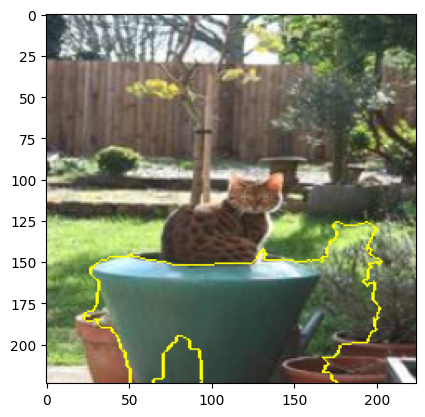

In [ ]:
index = 15

temp, mask = explanations[index].get_image_and_mask(explanations[index].top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry1)

Turn on areas that contribute against

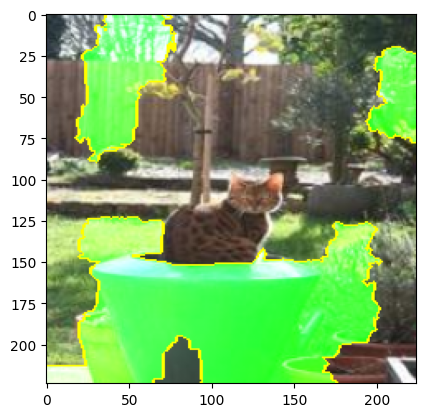

In [ ]:
temp, mask = explanations[index].get_image_and_mask(explanations[index].top_labels[0], positive_only=False, num_features=10, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)

In [ ]:
# In case it hasn't been trained yet
pretrained_weights = models.ResNet18_Weights.IMAGENET1K_V1
model = models.resnet18(weights=pretrained_weights)

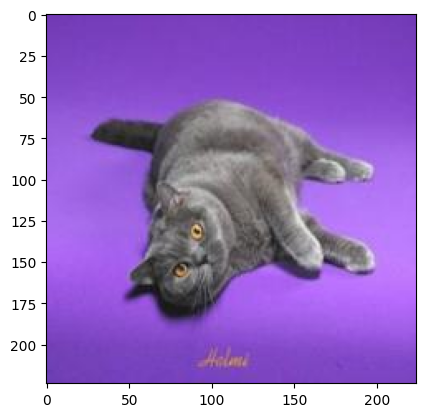

In [ ]:
#Get one image
my_image = get_image('/content/drive/My Drive/Explainable AI Group Work/resnet_model/resnet_data/cat_dog_images/cat/british_shorthair/cat-british_shorthair-78.jpg')
plt.imshow(my_image)

In [ ]:
# Image tensors
img_t = get_input_tensors(my_image)
model.eval()
logits = model(img_t)
probs = F.softmax(logits, dim=1)
probs5 = probs.topk(5)

image_explainer = lime_image.LimeImageExplainer()
image_explanation = image_explainer.explain_instance(np.array(pill_transf(my_image)),
                                         batch_predict, # classification function
                                         top_labels=5,
                                         hide_color=0,
                                         num_samples=1000) # number of images that will be sent to classification function

  0%|          | 0/1000 [00:00<?, ?it/s]

In [ ]:
tuple((p,c, idx2label[c]) for p, c in zip(probs5[0][0].detach().numpy(), probs5[1][0].detach().numpy()))

((0.22137074, 51, 'triceratops'),
 (0.107767016, 103, 'platypus'),
 (0.05484946, 286, 'cougar'),
 (0.045956697, 676, 'muzzle'),
 (0.03457594, 281, 'tabby'))

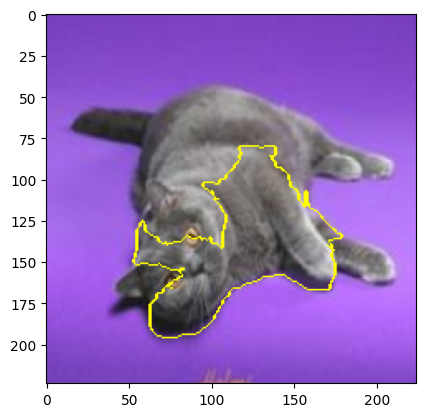

In [ ]:
temp, mask = image_explanation.get_image_and_mask(image_explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
img_boundry1 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry1)

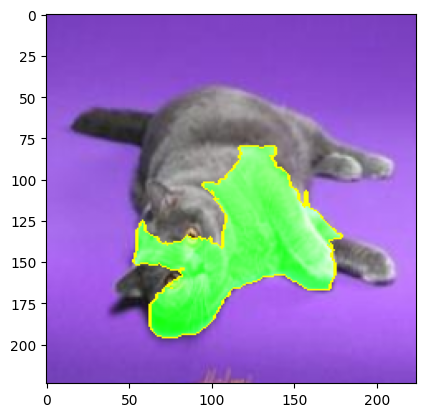

In [ ]:
temp, mask = image_explanation.get_image_and_mask(image_explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
img_boundry2 = mark_boundaries(temp/255.0, mask)
plt.imshow(img_boundry2)